# LSTM on Electricity Production

The goal of this project is to implement a LSTM Recurrent Neural Network (RNN) model to predict the values of a electricity production. The RNN will be trained on a sequence of electricity production data points and learn to predict the next value in the sequence.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Dataset

In [2]:
dataframe = pd.read_csv('Electric_Production.csv', index_col = 'DATE', parse_dates = True)

# Exploratory Data Analysis

In [3]:
dataframe.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [4]:
dataframe.tail()

,IPG2211A2N
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [5]:
dataframe.columns = ['Production']

In [6]:
dataframe.head()

,Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


<AxesSubplot:xlabel='DATE'>

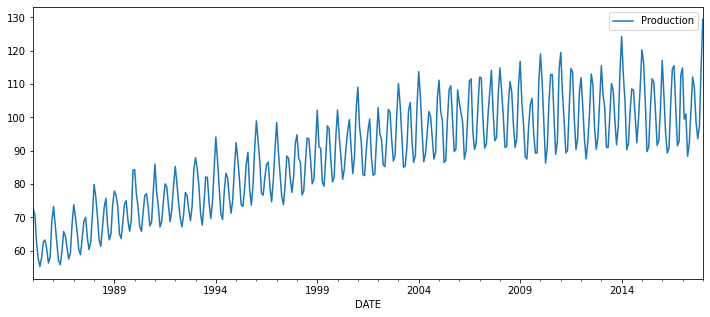

In [7]:
dataframe.plot(figsize = (12, 5))

In [8]:
len(dataframe)

397

In [9]:
test_size = 60

In [10]:
test_index = len(dataframe) - test_size

In [11]:
test_index

337

# Splitting The Dataset

Dataset splitting is an important step in machine learning and data analysis. It involves dividing a dataset into two or more subsets to train and evaluate a model effectively. The most common type of dataset splitting is into training and testing subsets.

In [12]:
train_dataframe = dataframe.iloc[:test_index]
test_dataframe = dataframe.iloc[test_index:]

In [13]:
train_dataframe

,Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2012-09-01,96.7431
2012-10-01,90.3805
2012-11-01,94.3417


In [14]:
test_dataframe

,Production
DATE,
2013-02-01,106.7340
2013-03-01,102.9948
2013-04-01,91.0092
2013-05-01,90.9634
2013-06-01,100.6957
2013-07-01,110.1480
2013-08-01,108.1756
2013-09-01,99.2809
2013-10-01,91.7871


# Scaling

Scaling is a common preprocessing step in data analysis and machine learning. It involves transforming the features of a dataset to a standard scale, which can help improve the performance and stability of models

MinMaxScaler is a popular scaling technique used in data preprocessing. It scales the features to a specified range, typically between 0 and 1.

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(train_dataframe)

MinMaxScaler()

In [18]:
scaled_train = scaler.transform(train_dataframe)
scaled_test = scaler.transform(test_dataframe)

In [19]:
scaled_train

array([[0.26787164],
       [0.23930506],
       [0.11118556],
       [0.03360141],
       [0.        ],
       [0.04324723],
       [0.11383466],
       [0.12362539],
       [0.0821141 ],
       [0.01558758],
       [0.04184632],
       [0.20880153],
       [0.28034575],
       [0.19746342],
       [0.1076311 ],
       [0.02676831],
       [0.00776963],
       [0.07145384],
       [0.16284756],
       [0.14284067],
       [0.08859503],
       [0.03454885],
       [0.06274611],
       [0.19977748],
       [0.28828524],
       [0.22979949],
       [0.16042442],
       [0.07547578],
       [0.05544864],
       [0.13364987],
       [0.21121533],
       [0.22987585],
       [0.13712954],
       [0.0789087 ],
       [0.11140528],
       [0.2378356 ],
       [0.38264127],
       [0.32485831],
       [0.23339603],
       [0.12346801],
       [0.09492169],
       [0.18379409],
       [0.27529533],
       [0.31867658],
       [0.19011296],
       [0.12416612],
       [0.15259868],
       [0.289

In [20]:
scaled_test

array([[0.80125567],
       [0.74298808],
       [0.55621766],
       [0.55550396],
       [0.70716143],
       [0.8544557 ],
       [0.82371998],
       [0.68511474],
       [0.5683396 ],
       [0.65401751],
       [0.90627196],
       [1.07428213],
       [0.89704533],
       [0.77054333],
       [0.54495901],
       [0.5737453 ],
       [0.7255851 ],
       [0.82954955],
       [0.82400671],
       [0.7028216 ],
       [0.57763635],
       [0.69169696],
       [0.8419847 ],
       [1.0121796 ],
       [0.95154964],
       [0.76598533],
       [0.53653489],
       [0.5575235 ],
       [0.73760731],
       [0.87763371],
       [0.8613823 ],
       [0.72624581],
       [0.56536014],
       [0.5882187 ],
       [0.74650203],
       [0.96253403],
       [0.80023967],
       [0.62393471],
       [0.52997917],
       [0.55197443],
       [0.75923638],
       [0.92289113],
       [0.93810316],
       [0.73938688],
       [0.56365849],
       [0.58552598],
       [0.89530472],
       [0.927

# Timeseries Generator

In time series analysis, a common approach is to use a time series generator to generate batches of sequential data for training recurrent neural networks (RNNs) or other time-based models. This allows you to efficiently process and train models on large time series datasets. Here's an example of how you can create a time series generator using the TimeseriesGenerator calss.

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Building Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [24]:
n_features = 1

In [25]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))

# Compiling Model 

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [26]:
model.compile(optimizer = 'adam', loss = 'mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [28]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [29]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

# Training The Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance

In [30]:
model.fit(generator, 
          validation_data = validation_generator,
          epochs = 20,
          callbacks = [early_stopping])

Epoch 1/20
325/325 [==============================] - 12s 20ms/step - loss: 0.0325 - val_loss: 0.0232
Epoch 2/20
325/325 [==============================] - 7s 22ms/step - loss: 0.0189 - val_loss: 0.0349
Epoch 3/20
325/325 [==============================] - 8s 23ms/step - loss: 0.0149 - val_loss: 0.0322


In [31]:
model.save('model_LSTM_production')

INFO:tensorflow:Assets written to: model_LSTM_production\assets


In [33]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

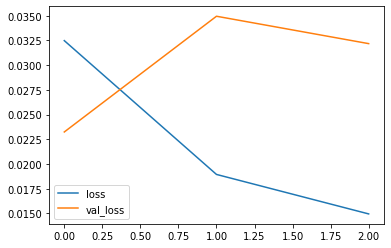

In [34]:
loss.plot()

# Test Prediction On Test Dataset

In [39]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(len(test_dataframe)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 68ms/step


In [41]:
test_prediction = scaler.inverse_transform(test_predictions)

In [42]:
test_predictions

[array([0.8149214], dtype=float32),
 array([0.7810354], dtype=float32),
 array([0.7874399], dtype=float32),
 array([0.84693706], dtype=float32),
 array([0.9337412], dtype=float32),
 array([0.96968853], dtype=float32),
 array([0.92363036], dtype=float32),
 array([0.8782593], dtype=float32),
 array([0.8895543], dtype=float32),
 array([0.9678361], dtype=float32),
 array([1.0724647], dtype=float32),
 array([1.09239], dtype=float32),
 array([1.0735313], dtype=float32),
 array([1.090834], dtype=float32),
 array([1.1376837], dtype=float32),
 array([1.2111853], dtype=float32),
 array([1.2779702], dtype=float32),
 array([1.3029583], dtype=float32),
 array([1.3092377], dtype=float32),
 array([1.3421732], dtype=float32),
 array([1.4236324], dtype=float32),
 array([1.54703], dtype=float32),
 array([1.6518679], dtype=float32),
 array([1.7140695], dtype=float32),
 array([1.7881521], dtype=float32),
 array([1.9063383], dtype=float32),
 array([2.0737352], dtype=float32),
 array([2.2770061], dtype=floa

In [44]:
test_dataframe['Prediction'] = test_prediction

C:\Users\DELL\AppData\Local\Temp\ipykernel_7068\4208336148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataframe['Prediction'] = test_prediction


In [45]:
test_dataframe.head()

,Production,Prediction
DATE,,
2013-02-01,106.7340,107.610968
2013-03-01,102.9948,105.436408
2013-04-01,91.0092,105.847401
2013-05-01,90.9634,109.665507
2013-06-01,100.6957,115.235981


<AxesSubplot:xlabel='DATE'>

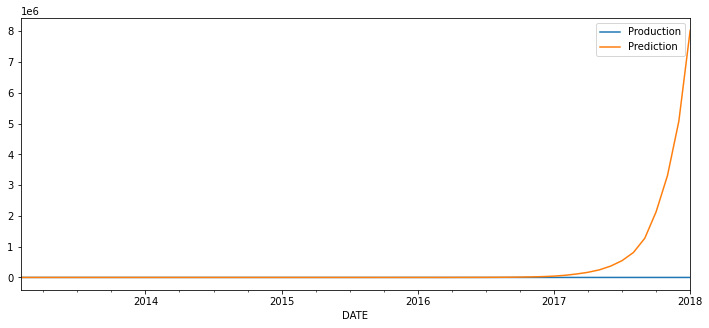

In [46]:
test_dataframe.plot(figsize = (12, 5))

# Predicting On Whole Dataset

In [47]:
full_scaler = MinMaxScaler()

In [49]:
full_dataset_scaled = full_scaler.fit_transform(dataframe)

In [50]:
length = 12
generator = TimeseriesGenerator(full_dataset_scaled, full_dataset_scaled, length=length, batch_size=1)

In [53]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

In [54]:
model.compile(optimizer = 'adam', loss = 'mse')

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit_generator(generator,epochs=8)

Epoch 1/8


C:\Users\DELL\AppData\Local\Temp\ipykernel_7068\3861282865.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=8)


385/385 [==============================] - 13s 19ms/step - loss: 0.0219
Epoch 2/8
385/385 [==============================] - 7s 18ms/step - loss: 0.0132
Epoch 3/8
385/385 [==============================] - 7s 19ms/step - loss: 0.0106
Epoch 4/8
385/385 [==============================] - 8s 20ms/step - loss: 0.0061
Epoch 5/8
385/385 [==============================] - 6s 16ms/step - loss: 0.0047
Epoch 6/8
385/385 [==============================] - 8s 20ms/step - loss: 0.0037
Epoch 7/8
385/385 [==============================] - 7s 18ms/step - loss: 0.0029
Epoch 8/8
385/385 [==============================] - 8s 20ms/step - loss: 0.0028


In [58]:
prediction = []
periods = 12
first_eval_batch = full_dataset_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    prediction.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 54ms/step


In [136]:
model.save('model_LSTM_full_df.h5')

In [59]:
loss = pd.DataFrame(model.history.history)

In [62]:
prediction = scaler.inverse_transform(prediction)

In [128]:
prediction_index = pd.date_range(start='2017-10-01',periods=periods,freq='MS')

In [129]:
prediction_df = pd.DataFrame(data=prediction,
                             index=prediction_index,
                             columns=['Prediction'])

In [130]:
prediction_df

,Prediction
2017-10-01,97.661921
2017-11-01,89.970254
2017-12-01,85.054490
2018-01-01,87.350563
2018-02-01,95.815967
2018-03-01,102.878736
2018-04-01,100.726288
2018-05-01,92.831176
2018-06-01,88.421185
2018-07-01,92.706764


<AxesSubplot:xlabel='DATE'>

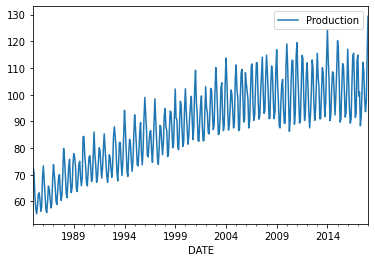

In [131]:
dataframe.plot()

<AxesSubplot:>

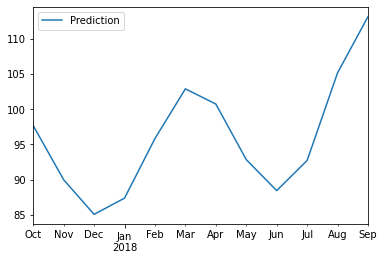

In [132]:
prediction_df.plot()

<AxesSubplot:xlabel='DATE'>

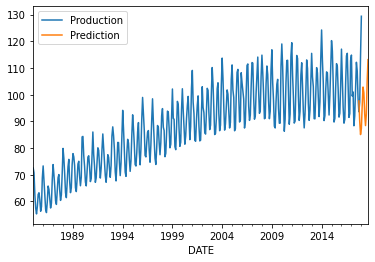

In [133]:
ax = dataframe.plot()
prediction_df.plot(ax = ax)